In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [2]:
df_train=pd.read_csv('train.csv', index_col='Id')
df_test=pd.read_csv('test.csv', index_col='Id')
submission=pd.read_csv('sample_submission.csv', index_col='Id')
data=df_train

df_train_len = len(df_train)
df_test_len = len(df_test)

In [3]:
# corr()함수를 통해 dataframe내의 모든 변수간의 상관관계가 0.1이상인 변수만 heatmap 출력

corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat['SalePrice'])>=0.1]
top_corr_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SalePrice'],
      dtype='object')

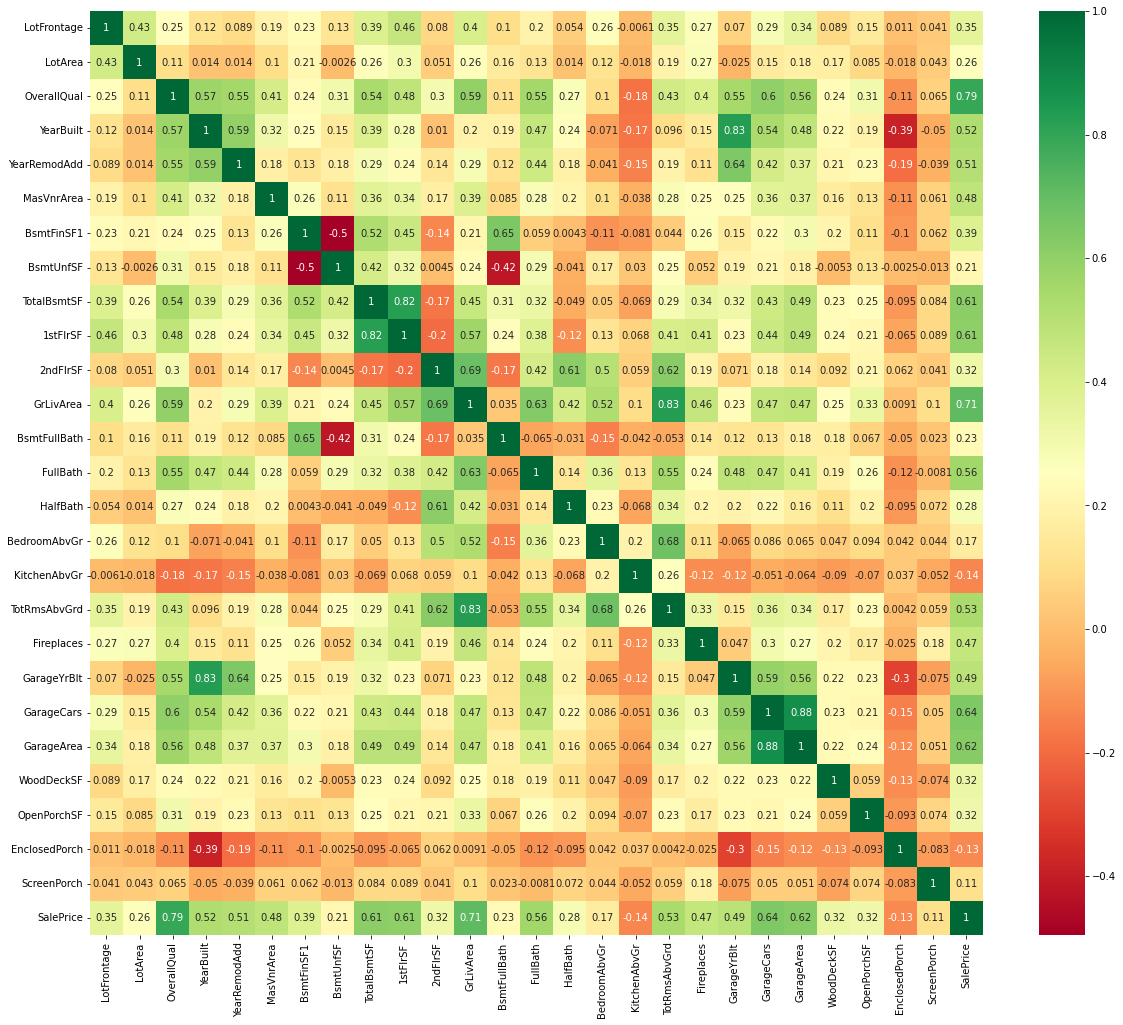

In [4]:
plt.figure(figsize=(20,17))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [5]:
df_train = df_train[top_corr_features]
df_test = df_test[top_corr_features.drop(['SalePrice'])]

In [6]:
y_train = df_train['SalePrice']
# y_train = np.log(y_train+1)

In [7]:
all_data = pd.concat((df_train, df_test), axis=0)
print('Length of alldata : ', len(all_data))
print(all_data.shape)
all_data.head()

Length of alldata :  2919
(2919, 27)


,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,2003,2003,196.0,706.0,150.0,856.0,856,...,8,0,2003.0,2.0,548.0,0,61,0,0,208500.0
2,80.0,9600,6,1976,1976,0.0,978.0,284.0,1262.0,1262,...,6,1,1976.0,2.0,460.0,298,0,0,0,181500.0
3,68.0,11250,7,2001,2002,162.0,486.0,434.0,920.0,920,...,6,1,2001.0,2.0,608.0,0,42,0,0,223500.0
4,60.0,9550,7,1915,1970,0.0,216.0,540.0,756.0,961,...,7,1,1998.0,3.0,642.0,0,35,272,0,140000.0
5,84.0,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1145,...,9,1,2000.0,3.0,836.0,192,84,0,0,250000.0


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

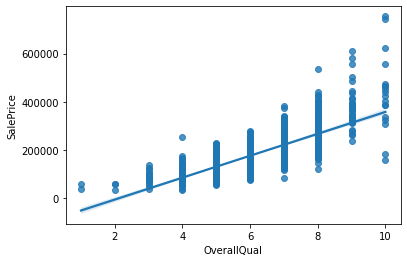

In [8]:
sns.regplot(all_data['OverallQual'], all_data['SalePrice']) # 전체적인 재료 및 마감 등급

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

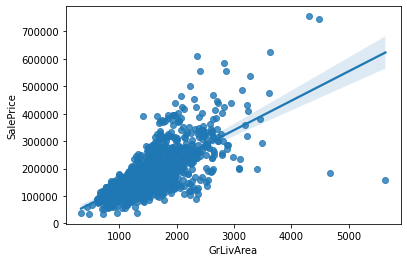

In [9]:
sns.regplot(all_data['GrLivArea'], all_data['SalePrice']) # 지상거실 면적 평방 피트

In [10]:
all_data = all_data.drop(all_data[(all_data['GrLivArea']>4000) & (all_data['SalePrice']<700000)].index)
# Outlier 2개값 제거 df_train['GrLivArea']>4000 2개 

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

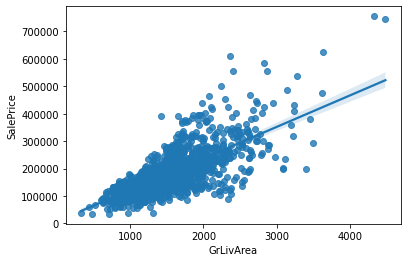

In [11]:
sns.regplot(all_data['GrLivArea'], all_data['SalePrice']) # 지상거실 면적 평방 피트

<AxesSubplot:ylabel='SalePrice'>

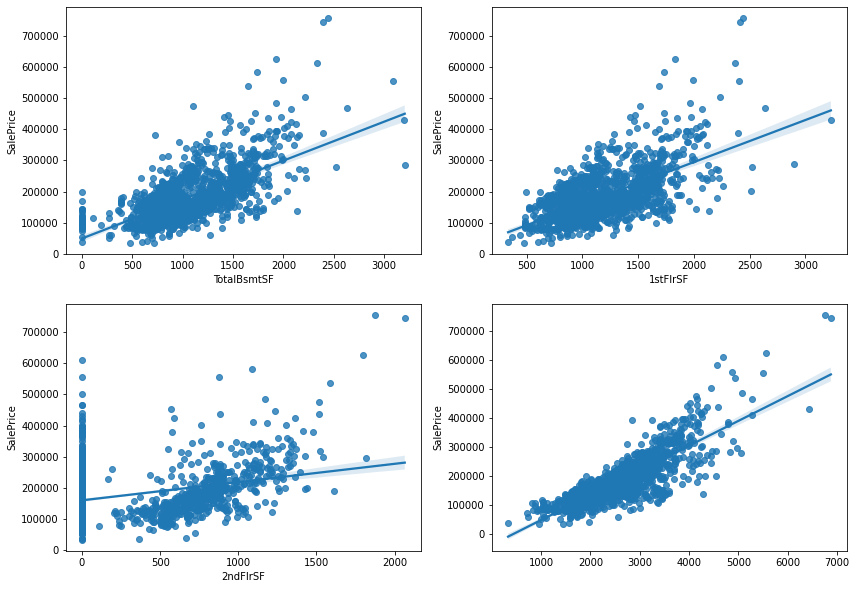

In [12]:
# 총 가용면적 (TotalSF Available)

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14, 10)
sns.regplot(all_data['TotalBsmtSF'], all_data['SalePrice'], ax=ax1)
sns.regplot(all_data['1stFlrSF'], all_data['SalePrice'], ax=ax2)
sns.regplot(all_data['2ndFlrSF'], all_data['SalePrice'], ax=ax3)
sns.regplot(all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF'], all_data['SalePrice'], ax=ax4)

# 면적(지하실 면적, 1층 면적, 2층 면적) 3개를 합한 column이 예측에 도움을 줄 수 있을 것 같기 때문에 Total_SF 칼럼을 추가해준다.

In [13]:
all_data['Total_SF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

<AxesSubplot:xlabel='Total_SF', ylabel='SalePrice'>

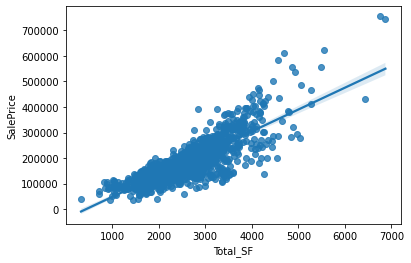

In [14]:
sns.regplot(all_data['Total_SF'], all_data['SalePrice'])

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

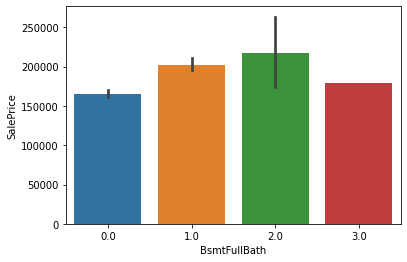

In [15]:
# 화장실 (Bath)

sns.barplot(all_data['BsmtFullBath'], all_data['SalePrice'])

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

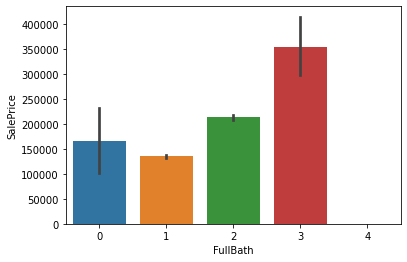

In [16]:
sns.barplot(all_data['FullBath'], all_data['SalePrice'])

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

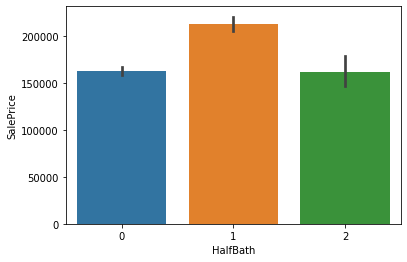

In [17]:
sns.barplot(all_data['HalfBath'], all_data['SalePrice'])

<AxesSubplot:ylabel='SalePrice'>

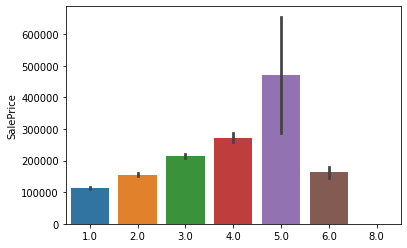

In [18]:
sns.barplot(all_data['BsmtFullBath'] + all_data['FullBath'] + all_data['HalfBath'], all_data['SalePrice'])

In [19]:
all_data['Total_Bath'] = all_data['BsmtFullBath'] + all_data['FullBath'] + all_data['HalfBath']

In [20]:
all_data = all_data.drop(all_data[(all_data['Total_Bath']>5) & (all_data['SalePrice']<200000)].index)
# Outlier 2개값 제거 all_data['Total_Bath']>4000 2개 

<AxesSubplot:xlabel='Total_Bath', ylabel='SalePrice'>

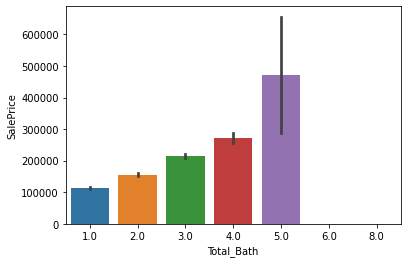

In [21]:
sns.barplot(all_data['Total_Bath'], all_data['SalePrice'])

In [22]:
all_data.shape

(2915, 29)

<AxesSubplot:ylabel='SalePrice'>

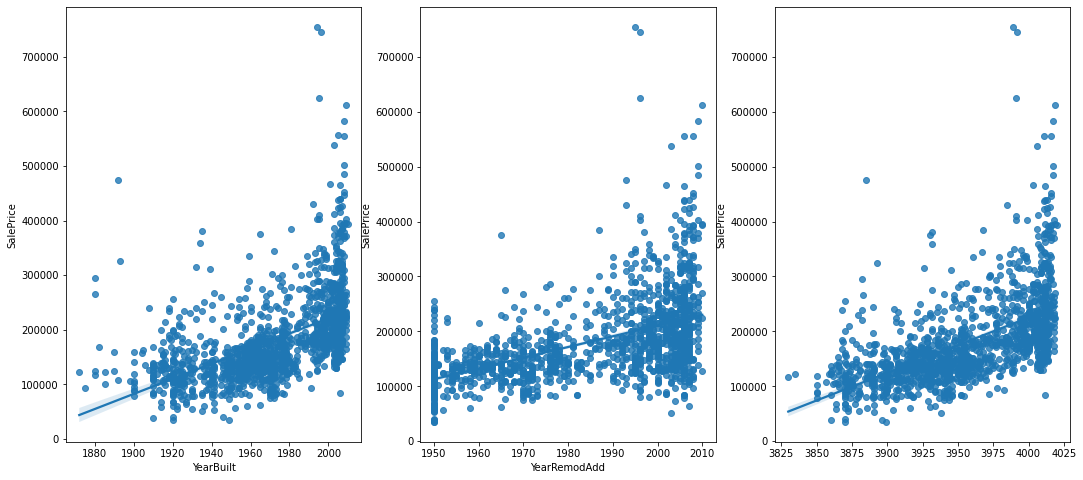

In [23]:
# 건축연도와 리모델링연도

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)
sns.regplot(all_data['YearBuilt'], all_data['SalePrice'], ax=ax1)
sns.regplot(all_data['YearRemodAdd'], all_data['SalePrice'], ax=ax2)
sns.regplot((all_data['YearBuilt']+all_data['YearRemodAdd']), all_data['SalePrice'], ax=ax3) #'/2' for graph scaling

In [24]:
# Total_YrBuilt_YrRmd
all_data['Total_YrBuilt_YrRmd'] = all_data['YearBuilt']+all_data['YearRemodAdd']

all_data = all_data.drop(all_data[(all_data['Total_YrBuilt_YrRmd']>1990) & (all_data['SalePrice']>700000)].index)
# Outlier 2개값 제거 all_data['Total_YrBuilt_YrRmd']>1990 2개 

<AxesSubplot:xlabel='Total_YrBuilt_YrRmd', ylabel='SalePrice'>

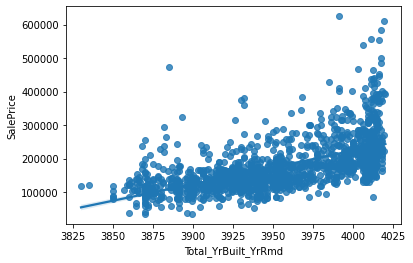

In [25]:
sns.regplot(all_data['Total_YrBuilt_YrRmd'], all_data['SalePrice'])

In [26]:
all_data_obj = all_data.select_dtypes(include='object') # 카테고리형
all_data_num = all_data.select_dtypes(exclude='object') # 수치형

print('Object type columns:\n', all_data_obj.columns)
print('-----------------------------------------------------------------------')
print('Numeric type columns:\n', all_data_num.columns)

Object type columns:
 Index([], dtype='object')
-----------------------------------------------------------------------
Numeric type columns:
 Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'Total_SF', 'Total_Bath',
       'Total_YrBuilt_YrRmd'],
      dtype='object')


In [27]:
all_data = all_data.fillna(all_data.mean())

In [28]:
X_train = all_data[:df_train_len]
X_test = all_data[df_train_len:]

In [29]:
X_train['SalePrice'] = y_train

In [30]:
from pycaret.regression import *

reg = setup(X_train, target='SalePrice', train_size=0.8)

,Description,Value
0,session_id,7795
1,Target,SalePrice
2,Original Data,"(1460, 30)"
3,Missing Values,True
4,Numeric Features,22
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1163, 66)"


In [31]:
best_model = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,18643.1700,734036104.6879,26864.1161,0.8788,0.1608,0.1136,0.0060
ridge,Ridge Regression,18725.7074,735499964.8000,26900.0570,0.8781,0.1596,0.1153,0.0070
lasso,Lasso Regression,18746.6135,739923574.4000,26971.0471,0.8777,0.1629,0.1149,0.1840
gbr,Gradient Boosting Regressor,17333.1984,739108013.8372,27036.4380,0.8757,0.1457,0.1036,0.0620
et,Extra Trees Regressor,17753.3462,751153777.7236,27309.3266,0.8745,0.1472,0.1052,0.1160
lr,Linear Regression,19175.7207,783106220.8000,27755.6268,0.8698,0.1671,0.1177,0.2750
lightgbm,Light Gradient Boosting Machine,17948.0338,782061531.5228,27862.2565,0.8684,0.1499,0.1070,0.0240
rf,Random Forest Regressor,18406.0263,815681038.9122,28482.6562,0.8623,0.1526,0.1098,0.1580
omp,Orthogonal Matching Pursuit,21172.0904,901819301.6933,29936.1352,0.8502,0.1731,0.1296,0.0040
en,Elastic Net,22860.2865,1115907340.8000,33259.4385,0.8153,0.2041,0.1394,0.0100


In [38]:
llar = create_model('llar', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17566.8271,6.065263e+08,24627.7537,0.8684,0.139,0.107


In [39]:
tuned_llar = tune_model(llar, optimize='RMSE', n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18130.1847,634943922.0941,25198.0936,0.8671,0.1560,0.1199
1,18101.7167,741287759.4979,27226.6002,0.8559,0.1553,0.1052
2,17407.5158,621530544.5646,24930.5143,0.9171,0.2014,0.1135
3,16992.9096,508764750.8926,22555.8141,0.9181,0.1555,0.1155
4,18284.8693,799746248.5439,28279.7852,0.8366,0.1699,0.1151
5,17432.0608,690538681.8114,26278.1027,0.8849,0.1563,0.1036
6,22956.9723,1253281721.3818,35401.7192,0.8296,0.1671,0.1256
7,17821.4484,557426861.8275,23609.8891,0.8932,0.1468,0.1179
8,18764.9939,634193828.9438,25183.2053,0.9087,0.1363,0.1057


In [40]:
final_model = finalize_model(tuned_llar)

In [41]:
prediction_llar = predict_model(final_model, data=X_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,57592.3188,5773472112.7864,75983.3673,-1704028199700332800782404419584.0000,0.4093,0.3196


In [45]:
prediction_llar.shape

(1453, 31)

In [43]:
submission['SalePrice'] = prediction_llar['Label']
submission.head(3)

,SalePrice
Id,
1461,NaN
1462,NaN
1463,NaN


In [46]:
submission.shape

(1459, 1)